TÓPICOS EM INTELIGÊNCIA COMPUTACIONAL - PROGRAMA DE PÓS-GRADUAÇÃO EM MODELAGEM COMPUTACIONAL DE SISTEMAS - 2021-2

<img src="imagens/ppgmcs.png" alt="tic">

---
# Univerisdade Federal do Tocantins - UFT
## Programa de Pós-graduação em Modelagem Computacional de Sistemas - PPGMCS

---
# Tópicos em Inteligência Computacional 2021-2
### Professor: Marcelo Lisboa. <mlisboa@uft.edu.br>
---

# Módulo 06 - Aplicações em Data Science

> **Scikit-Learn** - Biblioteca de aprendizado de máquina. [Scikit-Learn](https://scikit-learn.org/stable/)

## Regressão Linear

>  A **regressão linear** é uma equação para estimar a condicional (valor esperado) de uma variável **y**, dados os valores de algumas outras variáveis **x**. Isto é, a **análise de regressão** estuda a relação entre uma variável chamada a **variável dependente** (y) e outras variáveis chamadas **variáveis independentes** (x).

> $y = ax+b$

> **Regressão Linear Múltipla** ==>   $y = a_1x_1+a_2x_2+...+a_nx_n+b$




In [1]:
# importar o dataset
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
#
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# thema
sns.set_theme()

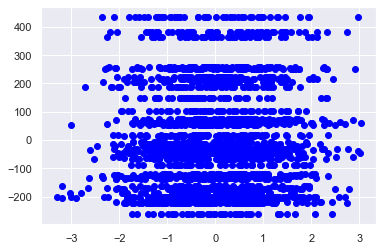

In [58]:
# dados
X_all, y_all = datasets.make_regression(n_samples=50,n_features=50, n_informative=10)
plt.plot(X_all,y_all, 'o', color='blue')
plt.show()

In [85]:
# dados de treimamento
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_all, y_all, train_size=0.7,shuffle=True)#,stratify=y_all)

In [86]:
print(X_all.shape, y_all.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50, 50) (50,)
(35, 50) (35,)
(15, 50) (15,)


In [87]:
# criando a instancia de regressao linear
model = linear_model.LinearRegression()

In [88]:
# Ajuste de modelo
model.fit(X_train, y_train)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1,normalize=False)

LinearRegression()

In [89]:
# Calcular a soma do erro quadratico SSE         
def sse(resid):
    return np.sum(resid**2)

In [90]:
# Calcular a soma do erro médio quadratíco MSE         
def mse(resid):
    return np.sum(resid**2)/len(resid)

In [91]:
# calcula o erro de treinamento
resid_train = y_train - model.predict(X_train) #y/saída desejada - y/saída obtida
sse_train = sse(resid_train) #soma do erro quadrático
print("SSE=",sse_train)

mse_train = mse(resid_train) #soma do erro quadrático
print("MSE=",mse_train)

SSE= 1.2554752861028612e-24
MSE= 3.587072246008175e-26


In [92]:
# calcula o SSE do test dataset
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print("SSE test=",sse_test)
mse_test = mse(resid_test)
print("MSE test=",mse_test)

SSE test= 64573.28780126089
MSE test= 4304.885853417393


#TREINAMENTO
SSE= 2.243286911620612e-24
MSE= 6.409391176058892e-26

#TESTE
SSE test= 118246.00533393268
MSE test= 7883.067022262179

## ERRO NO TESTE >= ERRO NO TREINAMENTO

In [93]:
# dados de treinamento
# Resultado muito grande --> valor não fez um bom trabalho
model.score(X_train, y_train)  # escore do r-quadrado = 1.0

1.0

In [94]:
# Matriz de coeficientes do modelo = r*r
print(model.coef_)

[ 14.36995526  -3.30458574 -11.15089424  35.27566376  11.6351424
  -1.09649415   7.48159307  57.71044034 -12.14033325  55.33098493
 -14.36581668  55.24411903   4.72644988   9.05713221  -5.62016262
  -4.16296668   7.35088781   4.72145245  -9.6766643   -0.43823691
  54.45592354  11.97221878  -5.1513313   -6.89525216 -14.70174275
  -0.9373871   48.69995079   7.2959933    2.2368848   -1.72516021
  -3.30827292  56.62537315   0.47942555   6.25591019 -13.66663895
   0.86017229  13.39271045  -3.94675874  -1.83276797   0.27900607
  23.32087866  18.90416781   7.30766973  -0.29199776   2.10031669
 -12.26800517   6.04629824  -1.31457032   7.65347924 -10.47410374]


In [95]:
# dados de teste
# escore do dataset de teste
model.score(X_test, y_test) # grande diferença entre os datasets de treinamento e teste --> indica
                            # modelo "superaquecido"

0.8374861152869064

In [96]:
# função de aproximacao grafica
def plot_valor_residuals_e_coef(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("Número de amostra")
    axes[0].set_ylabel("Residual")
    axes[0].set_title("dado de treinamento")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("Número de amostra")
    axes[1].set_ylabel("Residual")
    axes[1].set_title("Dados de teste")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("Número de coeficiente")
    axes[2].set_ylabel("Coeficiente")
    fig.tight_layout()
    return fig, axes

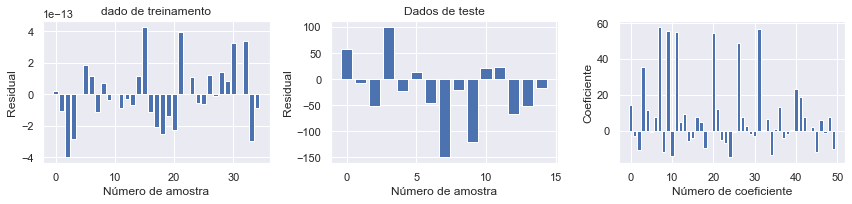

In [97]:
# grafico dos resultados
fig, ax = plot_valor_residuals_e_coef(resid_train, resid_test, model.coef_)

> O resíduo entre o modelo de regressão linear ordinário e os dados de treinamento (esquerda), o modelo e os dados de teste (meio) e os valores do coeficientes para os 50 recursos (direita).

> Problema de Overfiting devido a  poucos exemplos. Solução adicionar mais amostras.

In [98]:
# 1 solucion: -> regressao regularizada -> modelos matemáticos
model = linear_model.Ridge(alpha=2.5)

In [99]:
# Metodo de ajuste com os dados de treinamento
model.fit(X_train, y_train)

Ridge(alpha=2.5)

In [100]:
# calcular o modelo de predição para os datasets de treinamento e teste
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print('Treinamento:',sse_train)
#
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('Teste:',sse_test)

Treinamento: 4955.670357979884
Teste: 83905.19204766546


> Observamos que o SSE dos dados de treinamento não está mais próximo de zero, mas há uma ligeira diminuição no SSE para os dados de teste

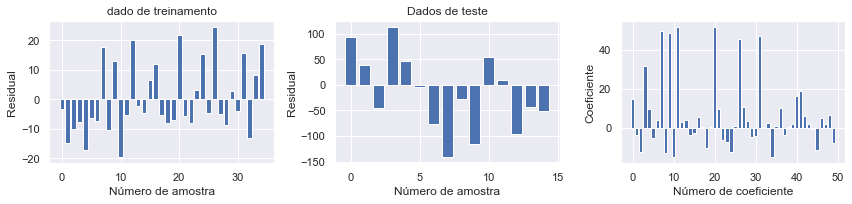

In [101]:
# resultados gráficos
fig, ax = plot_valor_residuals_e_coef(resid_train, resid_test, model.coef_)

> O resíduo entre o modelo de regressão regularizado de Ridge e
os dados de treinamento (esquerda), o modelo e os dados de teste (meio) e os valores dos coeficientes para os 50 recursos (direita)

In [102]:
# outro método regularização = LASSO
model = linear_model.Lasso(alpha=1.0)   # alpha = 1.0 arbitrario !!!!
# ajuste
model.fit(X_train, y_train)

Lasso()

In [103]:
# ajuste para o dataset de treinamento
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print('Treinameto:',sse_train)

Treinameto: 442.10268141036534


In [104]:
# ajuste para o dataset de teste
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('Teste:',sse_test)

Teste: 289.94486894818925


> Notamos que enquanto o SSE dos dados de treinamento aumentou em comparação com a regressão comum, o SSE para os dados de teste diminuiu significativamente

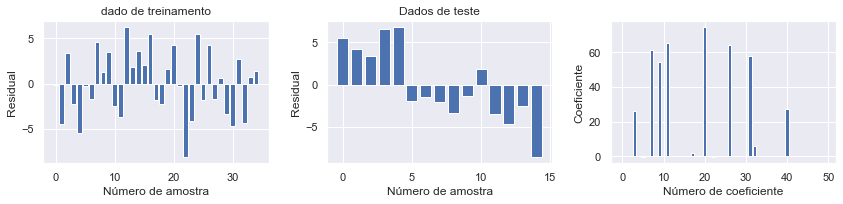

In [105]:
# gráfico
fig, ax = plot_valor_residuals_e_coef(resid_train, resid_test, model.coef_)

In [106]:
# Matriz de coeficientes do modelo = r*r
print(model.coef_)

[ 0.35553766 -0.         -0.         26.38666541  0.         -0.19619877
 -0.         61.44644516 -0.         54.53184382 -0.         65.04517231
 -0.         -0.         -0.         -0.         -0.          2.19249479
 -0.          0.         74.41182962 -0.         -0.10968649 -0.
 -0.          0.         64.19188878 -0.          0.          0.
 -0.         58.00843041  6.22089057 -0.         -0.          0.
 -0.         -0.          0.          0.         27.14022091  0.
  0.          0.15294419 -0.          0.          0.          0.
  0.          0.        ]


> O resíduo entre o modelo de regressão regularizado LASSO e os dados de treinamento (esquerda), o modelo e os dados de teste (meio) e os valores do coeficientes para os 50 recursos (direita)

> Observamos que na regressão LASSO, uma vez que calculada parece funcionar bem para o problema atual, e resolvemos repetidamente o mesmo problema usando valores diferentes para o parâmetro de força de regularização $\alpha$ enquanto armazenamos os valores dos coeficientes e valores SSE em matrizes NumPy.

In [113]:
# criar novos valores
alphas = np.logspace(-4, 2, 100)
coeffs = np.zeros((len(alphas), X_train.shape[1]))
sse_train = np.zeros_like(alphas)
sse_test = np.zeros_like(alphas)

In [114]:
print("alphas=",alphas)

alphas= [1.00000000e-04 1.14975700e-04 1.32194115e-04 1.51991108e-04
 1.74752840e-04 2.00923300e-04 2.31012970e-04 2.65608778e-04
 3.05385551e-04 3.51119173e-04 4.03701726e-04 4.64158883e-04
 5.33669923e-04 6.13590727e-04 7.05480231e-04 8.11130831e-04
 9.32603347e-04 1.07226722e-03 1.23284674e-03 1.41747416e-03
 1.62975083e-03 1.87381742e-03 2.15443469e-03 2.47707636e-03
 2.84803587e-03 3.27454916e-03 3.76493581e-03 4.32876128e-03
 4.97702356e-03 5.72236766e-03 6.57933225e-03 7.56463328e-03
 8.69749003e-03 1.00000000e-02 1.14975700e-02 1.32194115e-02
 1.51991108e-02 1.74752840e-02 2.00923300e-02 2.31012970e-02
 2.65608778e-02 3.05385551e-02 3.51119173e-02 4.03701726e-02
 4.64158883e-02 5.33669923e-02 6.13590727e-02 7.05480231e-02
 8.11130831e-02 9.32603347e-02 1.07226722e-01 1.23284674e-01
 1.41747416e-01 1.62975083e-01 1.87381742e-01 2.15443469e-01
 2.47707636e-01 2.84803587e-01 3.27454916e-01 3.76493581e-01
 4.32876128e-01 4.97702356e-01 5.72236766e-01 6.57933225e-01
 7.56463328e-01 

In [108]:
# Em seguida, fazemos um loop pelos valores α e realizamos a regressão LASSO para cada valor:
for n, alpha in enumerate(alphas):
    # modelo
    model = linear_model.Lasso(alpha=alpha, fit_intercept=False, tol=0.00001,
          max_iter=100000, positive=True)
    # ajuste
    model.fit(X_train, y_train)
    coeffs[n, :] = model.coef_
    sse_train[n] = sse(y_train - model.predict(X_train))
    sse_test[n] = sse(y_test - model.predict(X_test))

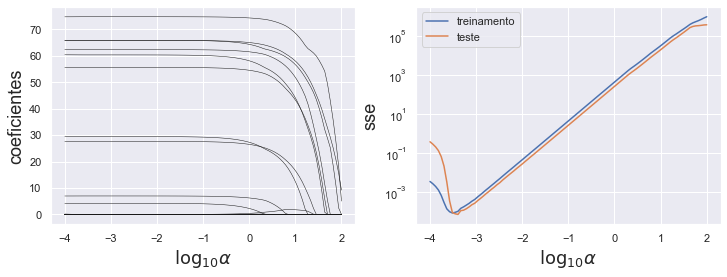

In [109]:
# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)
#
for n in range(coeffs.shape[1]):
    axes[0].plot(np.log10(alphas), coeffs[:, n], color='k', lw=0.5)
#  
axes[1].semilogy(np.log10(alphas), sse_train, label="treinamento")
axes[1].semilogy(np.log10(alphas), sse_test, label="teste")
axes[1].legend(loc=0)
#
axes[0].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[0].set_ylabel(r"coeficientes", fontsize=18)
#
axes[1].set_xlabel(r"${\log_{10}}\alpha$", fontsize=18)
axes[1].set_ylabel(r"sse", fontsize=18)
plt.show()

In [124]:
# ajustes usando o modelo
model = linear_model.LassoCV()
model.fit(X_all, y_all)

LassoCV()

In [125]:
# valor regularizado
model.alpha_


0.09342171565230176

In [126]:
print(np.log10(model.alpha_))

-1.0295521613311973


In [129]:
# valores
esid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
mse_train = mse(resid_train)
print('Treinamento sse:',sse_train)
print('Treinamento mse:',mse_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('Teste sse:',sse_test)
mse_test = mse(resid_test)
print('Teste mse:',mse_test)

Treinamento sse: 442.10268141036534
Treinamento mse: 12.631505183153296
Teste sse: 1.4166757580465066
Teste mse: 0.09444505053643378


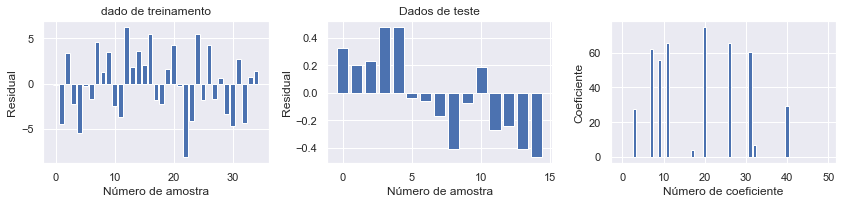

In [128]:
# grafico
fig, ax = plot_valor_residuals_e_coef(resid_train, resid_test, model.coef_)

In [138]:
# ajuste
model = linear_model.ElasticNetCV(l1_ratio=1)
model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=1)

In [139]:
# valores
print(model.alpha_)
print(model.l1_ratio)

0.11555514036690569
1


In [140]:
# valores
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
print('Treinamento:',sse_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('Teste:',sse_test)

Treinamento: 5.962159095070415
Teste: 4.014607394027584


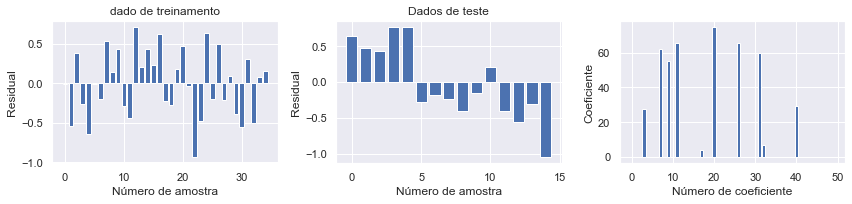

In [141]:
# grafico
fig, ax = plot_valor_residuals_e_coef(resid_train, resid_test, model.coef_)

## Classificação - Iris Dataset

In [33]:
# load o dataset
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [34]:
# visualizar nomes descritivos
print(iris.target_names)
print(iris.feature_names)
print(iris.target_names[0],"-",iris.target_names[1],"-",iris.target_names[2])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
setosa - versicolor - virginica


In [35]:
# visualizar dimensoes da matriz de dados
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [36]:
# split o dataset em dados de treiamento (70%) e teste(30%) e validacao
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
                                                                    train_size=0.7)

In [37]:
# clasificador a usar - neste caso, Regressão Logística
classifier = linear_model.LogisticRegression()

In [38]:
# treinamento para clasificar é feito por ajustes (fit)
classifier.fit(X_train, y_train)

LogisticRegression()

In [39]:
# Predicao dos dados = predic
y_test_pred = classifier.predict(X_test)

> O módulo **sklearn.metrics** contém funções auxiliares para auxiliar na análise do desempenho e precisão dos classificadores

In [40]:
# visualizar o reporte das metricas
report = metrics.classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [41]:
# matriz de confusão
matriz_conf = metrics.confusion_matrix(y_test, y_test_pred)
print(matriz_conf)

[[13  0  0]
 [ 0 14  1]
 [ 0  0 17]]


In [42]:
# valores unicos
vu = np.bincount(y_test)
print(vu)

[13 15 17]


In [43]:
# usar outros classifcadores: arvore de decisão
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

In [44]:
# visualiza as metricas
rep = metrics.confusion_matrix(y_test, y_test_pred)
print(rep)

[[13  0  0]
 [ 0 11  4]
 [ 0  0 17]]


In [45]:
# usando outros classifcadores
# vetor de treinamento
train_size_vec = np.linspace(0.1, 0.9, 30)

In [46]:
# classes de classifcadores arvore, vezinho mais proximo, RandomForest, calssifcador de suporte vetorial (SVC)
classifiers = [tree.DecisionTreeClassifier, neighbors.KNeighborsClassifier, svm.SVC,
               ensemble.RandomForestClassifier]

In [47]:
# guaradar la diagonal da matriz de confusao
cm_diags = np.zeros((3, len(train_size_vec), len(classifiers)),dtype=float)
#print(cm_diags)

In [48]:
# split os dados
for n, train_size in enumerate(train_size_vec):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
                                                                        train_size=train_size)
    for m, Classifier in enumerate(classifiers):
        classifier = Classifier()
        classifier.fit(X_train, y_train)
        y_test_p = classifier.predict(X_test)
        cm_diags[:, n, m] = metrics.confusion_matrix(y_test,y_test_p).diagonal()
        cm_diags[:, n, m] /= np.bincount(y_test)

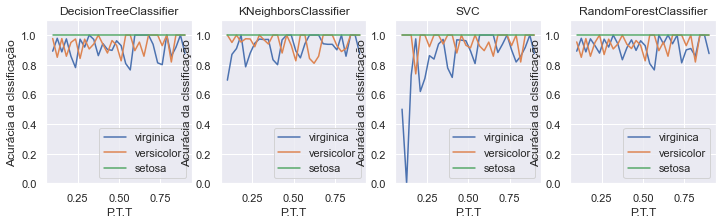

In [49]:
# acuracia de clasificação = grafico
fig, axes = plt.subplots(1, len(classifiers), figsize=(12, 3))
#
for m, Classifier in enumerate(classifiers):
    axes[m].plot(train_size_vec, cm_diags[2, :, m], label=iris.target_names[2])
    axes[m].plot(train_size_vec, cm_diags[1, :, m], label=iris.target_names[1])
    axes[m].plot(train_size_vec, cm_diags[0, :, m], label=iris.target_names[0])
    axes[m].set_title(type(Classifier()).__name__)
    axes[m].set_ylim(0, 1.1)
    axes[m].set_ylabel("Acurácia da clssificação")
    axes[m].set_xlabel("P.T.T")
    axes[m].legend(loc=4)

## Clusterização - Iris dataset

In [50]:
# load os dados
X, y = iris.data, iris.target
#print("Dados=",X)
#print("Classes=",y)

In [51]:
# cluster usando k-means, especificar o numero de clusters
n_clusters = 3
clustering = cluster.KMeans(n_clusters=n_clusters)

In [52]:
# ajuste
clustering.fit(X)

KMeans(n_clusters=3)

In [53]:
# visualizar resultados usando metodo predict (fit_predict)
y_pred = clustering.predict(X)

In [54]:
# comparar valores
print(y_pred[::28])
print(y[::28])

[1 1 0 0 2 2]
[0 0 1 1 2 2]


In [55]:
# arrumar os valores
idx_0, idx_1, idx_2 = (np.where(y_pred == n) for n in range(3))
print(idx_0)
print(idx_1)
print(idx_2)
#y_pred[idx_0], y_pred[idx_1], y_pred[idx_2] = 2, 0, 1
#print(y_pred[idx_0])
#print(y_pred[idx_1])
#print(y_pred[idx_2])
#print(y_pred[::8])

(array([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
       119, 121, 123, 126, 127, 133, 138, 142, 146, 149], dtype=int64),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64),)
(array([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
       115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
       134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
      dtype=int64),)


In [56]:
# matriz confusão
mc = metrics.confusion_matrix(y, y_pred)
print(mc)

[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


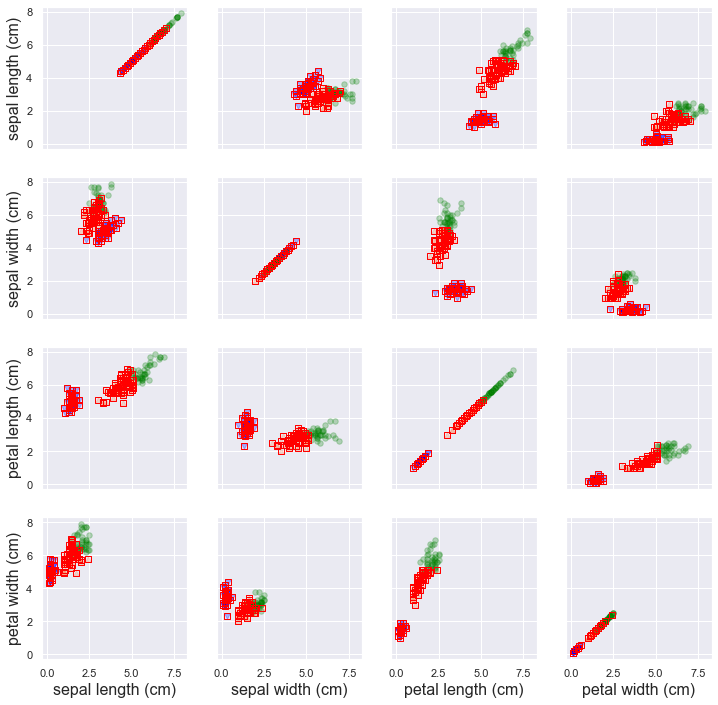

In [57]:
# grafico
N = X.shape[1]
#
fig, axes = plt.subplots(N, N, figsize=(12, 12), sharex=True, sharey=True)
colors = ["coral", "blue", "green"]
markers = ["^", "v", "o"]
for m in range(N):
    for n in range(N):
        for p in range(n_clusters):
            mask = y_pred == p
            axes[m, n].scatter(X[:, m][mask], X[:, n][mask], s=30, marker=markers[p], 
                               color=colors[p], alpha=0.25)
        for idx in np.where(y != y_pred):
            axes[m, n].scatter(X[idx, m], X[idx, n], s=30, marker="s", edgecolor="red",
                               facecolor=(1,1,1,0))
    axes[N-1, m].set_xlabel(iris.feature_names[m], fontsize=16)
    axes[m, 0].set_ylabel(iris.feature_names[m], fontsize=16)

> O resultado do agrupamento das amostras do dataset íris na figura acima mostra que o agrupamento faz um bom trabalho em reconhecimento de amostras que pertencem a diferentes grupos.

------
Marcelo Lisboa &copy; 2021. mlisboa@uft.edu.br